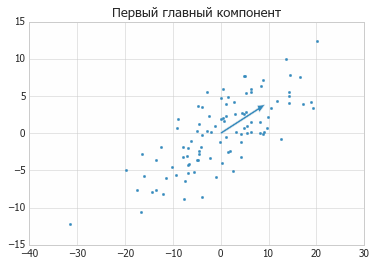

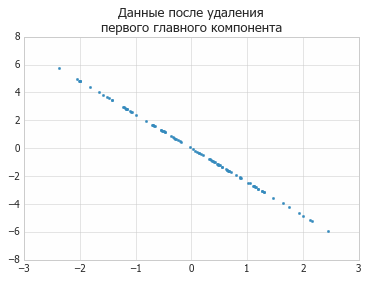

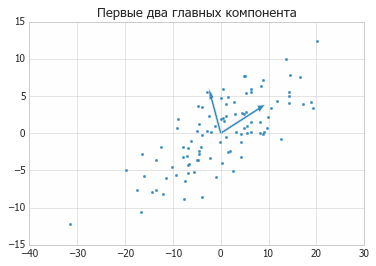

In [7]:
# -*- coding: utf-8 -*-
"""
Глава 10, рис. 7,8,9
"""

import sys
sys.path.append("../../code-python3-ru")

from lib.linear_algebra import shape, get_row, get_column, make_matrix, \
     vector_mean, vector_sum, dot, magnitude, vector_subtract, scalar_multiply
from lib.statistics import correlation, standard_deviation, mean
from lib.probability import inverse_normal_cdf
from lib.gradient_descent import maximize_batch

import math, random
from functools import partial, reduce

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline  

mpl.style.use('ggplot')  
mpl.style.use('seaborn-whitegrid')  
mpl.rcParams['axes.facecolor'] = u'fefefe'
#mpl.rcParams.update({'font.family': 'Ubuntu Condensed'})   
mpl.rcParams.update({'font.family': 'Tahoma'})

X = [
    [20.9666776351559,-13.1138080189357], [22.7719907680008,-19.8890894944696],
    [25.6687103160153,-11.9956004517219], [18.0019794950564,-18.1989191165133],
    [21.3967402102156,-10.8893126308196], [0.443696899177716,-19.7221132386308],
    [29.9198322142127,-14.0958668502427], [19.0805843080126,-13.7888747608312],
    [16.4685063521314,-11.2612927034291], [21.4597664701884,-12.4740034586705],
    [3.87655283720532,-17.575162461771],  [34.5713920556787,-10.705185165378],
    [13.3732115747722,-16.7270274494424], [20.7281704141919,-8.81165591556553],
    [24.839851437942,-12.1240962157419],  [20.3019544741252,-12.8725060780898],
    [21.9021426929599,-17.3225432396452], [23.2285885715486,-12.2676568419045],
    [28.5749111681851,-13.2616470619453], [29.2957424128701,-14.6299928678996],
    [15.2495527798625,-18.4649714274207], [26.5567257400476,-9.19794350561966],
    [30.1934232346361,-12.6272709845971], [36.8267446011057,-7.25409849336718],
    [32.157416823084,-10.4729534347553],  [5.85964365291694,-22.6573731626132],
    [25.7426190674693,-14.8055803854566], [16.237602636139,-16.5920595763719],
    [14.7408608850568,-20.0537715298403], [6.85907008242544,-18.3965586884781],
    [26.5918329233128,-8.92664811750842], [-11.2216019958228,-27.0519081982856],
    [8.93593745011035,-20.8261235122575], [24.4481258671796,-18.0324012215159],
    [2.82048515404903,-22.4208457598703], [30.8803004755948,-11.455358009593],
    [15.4586738236098,-11.1242825084309], [28.5332537090494,-14.7898744423126],
    [40.4830293441052,-2.41946428697183], [15.7563759125684,-13.5771266003795],
    [19.3635588851727,-20.6224770470434], [13.4212840786467,-19.0238227375766],
    [7.77570680426702,-16.6385739839089], [21.4865983854408,-15.290799330002],
    [12.6392705930724,-23.6433305964301], [12.4746151388128,-17.9720169566614],
    [23.4572410437998,-14.602080545086],  [13.6878189833565,-18.9687408182414],
    [15.4077465943441,-14.5352487124086], [20.3356581548895,-10.0883159703702],
    [20.7093833689359,-12.6939091236766], [11.1032293684441,-14.1383848928755],
    [17.5048321498308,-9.2338593361801],  [16.3303688220188,-15.1054735529158],
    [26.6929062710726,-13.306030567991],  [34.4985678099711,-9.86199941278607],
    [39.1374291499406,-10.5621430853401], [21.9088956482146,-9.95198845621849],
    [22.2367457578087,-17.2200123442707], [10.0032784145577,-19.3557700653426],
    [14.045833906665,-15.871937521131],   [15.5640911917607,-18.3396956121887],
    [24.4771926581586,-14.8715313479137], [26.533415556629,-14.693883922494],
    [12.8722580202544,-21.2750596021509], [24.4768291376862,-15.9592080959207],
    [18.2230748567433,-14.6541444069985], [4.1902148367447,-20.6144032528762],
    [12.4332594022086,-16.6079789231489], [20.5483758651873,-18.8512560786321],
    [17.8180560451358,-12.5451990696752], [11.0071081078049,-20.3938092335862],
    [8.30560561422449,-22.9503944138682], [33.9857852657284,-4.8371294974382],
    [17.4376502239652,-14.5095976075022], [29.0379635148943,-14.8461553663227],
    [29.1344666599319,-7.70862921632672], [32.9730697624544,-15.5839178785654],
    [13.4211493998212,-20.150199857584],  [11.380538260355,-12.8619410359766],
    [28.672631499186,-8.51866271785711],  [16.4296061111902,-23.3326051279759],
    [25.7168371582585,-13.8899296143829], [13.3185154732595,-17.8959160024249],
    [3.60832478605376,-25.4023343597712], [39.5445949652652,-11.466377647931],
    [25.1693484426101,-12.2752652925707], [25.2884257196471,-7.06710309184533],
    [6.77665715793125,-22.3947299635571], [20.1844223778907,-16.0427471125407],
    [25.5506805272535,-9.33856532270204], [25.1495682602477,-7.17350567090738],
    [15.6978431006492,-17.5979197162642], [37.42780451491,-10.843637288504],
    [22.974620174842,-10.6171162611686],  [34.6327117468934,-9.26182440487384],
    [34.7042513789061,-6.9630753351114],  [15.6563953929008,-17.2196961218915],
    [25.2049825789225,-14.1592086208169]
]


def de_mean_matrix(A):
    """вернуть результат вычитания из каждого значения
    в A среднего значения ее столбца. Результирующая матрица
    имеет нулевое среднее в каждом столбце"""
    nr, nc = shape(A)
    column_means, _ = scale(A)
    return make_matrix(nr, nc, lambda i, j: A[i][j] - column_means[j])

# стандартизировать, вернув кортеж со списками, состоящими
# из средних и стандартных отклонений
def scale(data_matrix):
    """вернуть средние и стандартные отклонения для каждого столбца"""
    num_rows, num_cols = shape(data_matrix)
    means = [mean(get_column(data_matrix,j))
             for j in range(num_cols)]
    stdevs = [standard_deviation(get_column(data_matrix,j))
              for j in range(num_cols)]
    return means, stdevs


# Метод главных компонент

def direction(w):
    mag = magnitude(w)
    return [w_i / mag for w_i in w]


def directional_variance_i(x_i, w):
    """дисперсия строки x_i в направлении, определяемом w"""
    return dot(x_i, direction(w)) ** 2

def directional_variance(X, w):
    """дисперсия данных в направлении, определяемом w"""
    return sum(directional_variance_i(x_i, w) for x_i in X)
    
def directional_variance_gradient(X, w):
    return vector_sum(directional_variance_gradient_i(x_i,w) for x_i in X)

def first_principal_component(X):
    guess = [1 for _ in X[0]]
    unscaled_maximizer = maximize_batch(
        partial(directional_variance, X),           # теперь это функция w
        partial(directional_variance_gradient, X),  # теперь это функция w
        guess)
    return direction(unscaled_maximizer)




def directional_variance_gradient_i(x_i, w):
    """вклад строки x_i в градиент w-направленной дисперсии"""
    projection_length = dot(x_i, direction(w))
    return [2 * projection_length * x_ij for x_ij in x_i]
    
def first_principal_component_sgd(X):
    guess = [1 for _ in X[0]]
    unscaled_maximizer = maximize_stochastic(
        lambda x, _, w: directional_variance_i(x, w),
        lambda x, _, w: directional_variance_gradient_i(x, w),
        X, [None for _ in X], guess)
    return direction(unscaled_maximizer)
    
def project(v, w):
    """вернуть проекцию v на направление w"""
    coefficient = dot(v, w)
    return scalar_multiply(coefficient, w)
    
def remove_projection_from_vector(v, w):
    """проецирует v в w и вычитает результат из v"""
    return vector_subtract(v, project(v, w))
    
def remove_projection(X, w):
    """для каждой строки X
    проецирует строку в w, и вычитает результат из строки"""
    return [remove_projection_from_vector(x_i, w) for x_i in X]
    
  
    
def principal_component_analysis(X, num_components):
    components = []
    for _ in range(num_components):
        component = first_principal_component(X)   # _sgd
        components.append(component)
        X = remove_projection(X, component)
        
    return components

def transform_vector(v, components):
    return [dot(v, w) for w in components]
    
def transform(X, components):
    return [transform_vector(x_i, components) for x_i in X] 
    
def get_principal_component():
    fig = plt.figure()
    
    Y = de_mean_matrix(X) # центрировать
    x, y = zip(*Y)
    
    components = principal_component_analysis(Y, 2)
    #print ("главные компоненты", components)
    #print ("первая точка", Y[0])   
    #print ("первая точка после трансформации", transform_vector(Y[0], components))
  
    #[0.9238554090431896, 0.382741666377781]
    #[0.6663708720254604, 1.6869418499129427]
    
    plt.scatter(x, y, marker='.', color="#348ABD")  #, label='ys1'
    #plt.xlabel('xs')
    #plt.ylabel('ys')
    
    plt.arrow(0,0,components[0][0]*10, components[0][1]*10, width=0.3, head_width=1, length_includes_head=True)
    
    plt.title("Первый главный компонент", fontsize=13) 
    plt.show()
    #fig.savefig("fig_10-7", dpi=300, bbox_inches='tight', facecolor='w') 
    
    
def get_direction(X):
    Y = de_mean_matrix(X) # центрировать
    
    components = principal_component_analysis(Y, 2)
    
    #print ("главные компоненты", components)
    #print ("первая точка", Y[0])   
    #print ("первая точка после трансформации", transform_vector(Y[0], components))  
    return [components[0][0], components[0][1]]   
    
    
def get_data_after_removal():
    fig = plt.figure()
   
    Y = de_mean_matrix(X)
    w = get_direction(Y)
    Z = remove_projection(Y, w)
    #print (Z)
    x, y = zip(*Z)
    
    plt.scatter(x, y, marker='.', color="#348ABD")  

   
    plt.title("Данные после удаления\nпервого главного компонента", fontsize=13) 
    plt.show()
    #fig.savefig("fig_10-8", dpi=300, bbox_inches='tight', facecolor='w')     


def get_two_directions():
    fig = plt.figure()
    
    Y = de_mean_matrix(X) # центрировать
    x, y = zip(*Y)
    
    components = principal_component_analysis(Y, 2)
    #print ("главные компоненты", components)
    #print ("первая точка", Y[0])   
    #print ("первая точка после трансформации", transform_vector(Y[0], components))
  
    plt.scatter(x, y, marker='.', color="#348ABD")  #, label='ys1'

    
    plt.arrow(0,0,components[0][0]*10, components[0][1]*10, width=0.3, head_width=1, length_includes_head=True)
    # данные из ветора после удаления 1го компонента Z[0] = [-0.4988817371772216, 1.2041923622423651]
    plt.arrow(0,0,-0.4988817371772216*5, 1.2041923622423651*5, width=0.4, head_width=1, length_includes_head=True)
    
    # данные из ветора после удаления 1го компонента Z[0] = [-0.4988817371772216, 1.2041923622423651]
    
    plt.title("Первые два главных компонента", fontsize=13) 
    plt.show()
    #fig.savefig("fig_10-9", dpi=300, bbox_inches='tight', facecolor='w') 
    
    
get_principal_component()    
get_data_after_removal()
get_two_directions()